### <span style = 'color:blue'> TimeSeries</span>
#### <span style = 'color:blue'>Use any forecasting method to predict Footfalls from the given dataset  </span>

For Data set please click here <a href="https://drive.google.com/file/d/1zlhACuGnjEuQCuv1Znk2yh1zcbS1wXDs/view?usp=sharing" title="Google Drive">Click here</a>

The given data is about Footfaals and we have 158 rows and here we have foot falls from 1709 to 2132 
here we have time interval as months
predict the data using any forecasting method for next 10 footfalls values

**data should 70% for training and 30% testing**

**Expected results**

- **check for dicky fuller test, rolling mean and stationarity**
- **obtain scores and interpret it**
- **predict the data or plot the graph that can plot predicted data with actual data**

In [1]:
pip install pmdarima

Note: you may need to restart the kernel to use updated packages.


In [81]:
#importing pandas for data manupulation
import pandas as pd
#importing matplotlib for plotting
import matplotlib.pyplot as plt
#importing seaborn for advanced plotting
import seaborn as sns
#importing datetime for date and timely operation on dataset(particularly for timeseries data)
import datetime as dt
#importing numpy for numaric operation
import numpy as np
#importing auto arima model
from pmdarima import auto_arima
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.stattools import acf
#importing arima model
from statsmodels.tsa.arima.model import ARIMA
#importing seasonal decompose for testing data for seasonality
from statsmodels.tsa.seasonal import seasonal_decompose
#importing filterwarning for filtering warnings we get
from warnings import filterwarnings
#adfuller is required for dicky fuller test which can test data for stationarity of the data
from statsmodels.tsa.stattools import adfuller
import statsmodels.formula.api as smf
import statsmodels.api as sm
filterwarnings("ignore")


<AxesSubplot:>

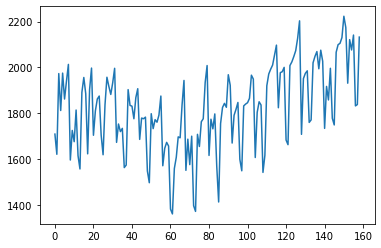

In [82]:
#importing the data
df = pd.read_csv("footfalls.csv")
df.Footfalls.plot()

In [83]:
#viweing the data
df.head()

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,Jan-91,1709,1,7.443664,1,1,0,0,0,0,0,0,0,0,0,0,0
1,Feb-91,1621,2,7.390799,4,0,1,0,0,0,0,0,0,0,0,0,0
2,Mar-91,1973,3,7.587311,9,0,0,1,0,0,0,0,0,0,0,0,0
3,Apr-91,1812,4,7.502186,16,0,0,0,1,0,0,0,0,0,0,0,0
4,May-91,1975,5,7.588324,25,0,0,0,0,1,0,0,0,0,0,0,0


In [84]:
#checking for basic information of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Month          159 non-null    object 
 1   Footfalls      159 non-null    int64  
 2   t              159 non-null    int64  
 3   log_footfalls  159 non-null    float64
 4   t_square       159 non-null    int64  
 5   Jan            159 non-null    int64  
 6   Feb            159 non-null    int64  
 7   Mar            159 non-null    int64  
 8   Apr            159 non-null    int64  
 9   May            159 non-null    int64  
 10  Jun            159 non-null    int64  
 11  Jul            159 non-null    int64  
 12  Aug            159 non-null    int64  
 13  Sep            159 non-null    int64  
 14  Oct            159 non-null    int64  
 15  Nov            159 non-null    int64  
 16  Dec            159 non-null    int64  
dtypes: float64(1), int64(15), object(1)
memory usage: 21.2

In [85]:
##a deeper dive into the details of the dataset
df.describe()

,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,1822.226415,80.000000,7.502746,8506.666667,0.088050,0.088050,0.088050,0.081761,0.081761,0.081761,0.081761,0.081761,0.081761,0.081761,0.081761,0.081761
std,181.601732,46.043458,0.101775,7605.556039,0.284263,0.284263,0.284263,0.274866,0.274866,0.274866,0.274866,0.274866,0.274866,0.274866,0.274866,0.274866
min,1361.000000,1.000000,7.215975,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1698.500000,40.500000,7.437500,1640.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1831.000000,80.000000,7.512618,6400.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1967.000000,119.500000,7.584265,14280.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2223.000000,159.000000,7.706613,25281.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [86]:
#Checking for null values
df.isnull().sum()

Month            0
Footfalls        0
t                0
log_footfalls    0
t_square         0
Jan              0
Feb              0
Mar              0
Apr              0
May              0
Jun              0
Jul              0
Aug              0
Sep              0
Oct              0
Nov              0
Dec              0
dtype: int64

In [87]:
#having a look at the tail of the data
df.tail()

,Month,Footfalls,t,log_footfalls,t_square,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
154,Nov-03,2076,155,7.638198,24025,0,0,0,0,0,0,0,0,0,0,1,0
155,Dec-03,2141,156,7.669028,24336,0,0,0,0,0,0,0,0,0,0,0,1
156,Jan-04,1832,157,7.513164,24649,1,0,0,0,0,0,0,0,0,0,0,0
157,Feb-04,1838,158,7.516433,24964,0,1,0,0,0,0,0,0,0,0,0,0
158,Mar-04,2132,159,7.664816,25281,0,0,1,0,0,0,0,0,0,0,0,0


There are no null values

no need to handle missing values


In [88]:
#data type of the Month column is object and we need to change it to datetime. 
df['Month'] = pd.date_range(start = 'Jan-91', periods = 159, freq = 'M') #converting the month col into '%y-mm-dd'format

lets see the amount of data we will having in our training data


We have 158 rows in our data

lets use 70% of data for training


<AxesSubplot:>

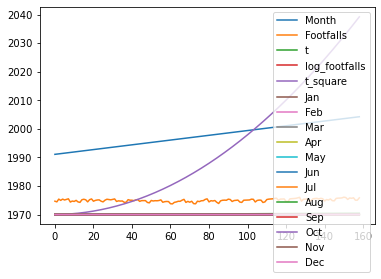

In [89]:
#plotting the dataset
df.plot()

In [90]:
#lets drop the non-required columns
df.drop(['t', 'log_footfalls','t_square','Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], axis = 1, inplace = True)

In [91]:
#checking for duplicate index
df[df.index.duplicated()]

,Month,Footfalls


In [92]:
#re-defining index
df.reindex()

,Month,Footfalls
0,1991-01-31,1709
1,1991-02-28,1621
2,1991-03-31,1973
3,1991-04-30,1812
4,1991-05-31,1975
...,...,...
154,2003-11-30,2076
155,2003-12-31,2141
156,2004-01-31,1832
157,2004-02-29,1838


In [95]:
#Let's plot data based on each month
to_plot_monthly_variation = df

In [96]:
# only storing month for each index 
mon = df['Month']

In [97]:
# decompose yyyy-mm data-type 
temp= pd.DatetimeIndex(mon)

In [98]:
# assign month part of that data to ```month``` variable
month = pd.Series(temp.month)

In [99]:
# dropping month from to_plot_monthly_variation
to_plot_monthly_variation = to_plot_monthly_variation.drop(['Month'], axis = 1)

In [100]:
# join months so we can get month to average monthly rider mapping
to_plot_monthly_variation = to_plot_monthly_variation.join(month)

In [101]:
# A quick glance
to_plot_monthly_variation.head()

,Footfalls,Month
0,1709,1
1,1621,2
2,1973,3
3,1812,4
4,1975,5


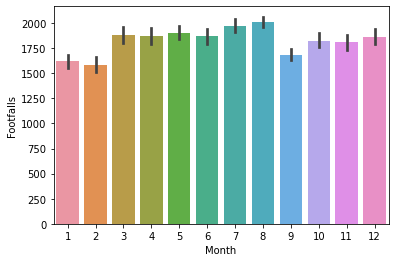

In [102]:
# Plotting bar plot for each month
sns.barplot(x = 'Month', y = 'Footfalls', data = to_plot_monthly_variation)
plt.show()

In [103]:
#To know number of rows we will be using for training data
int(0.70*(len(df)))

111

In [104]:
#splitting our data for training
train = df[:int(0.70*(len(df)))]
valid = df[int(0.70*(len(df))):]

In [105]:
#we will be using 30% of the data for test data
#Test data
print("Length of test dataset ",len(valid))
valid.head()

Length of test dataset  48


,Month,Footfalls
111,2000-04-30,1971
112,2000-05-31,1992
113,2000-06-30,2010
114,2000-07-31,2054
115,2000-08-31,2097


In [106]:
#We areconverting the int data to float
train['Footfalls'] = train['Footfalls'].astype(float)
train.head()

,Month,Footfalls
0,1991-01-31,1709.0
1,1991-02-28,1621.0
2,1991-03-31,1973.0
3,1991-04-30,1812.0
4,1991-05-31,1975.0


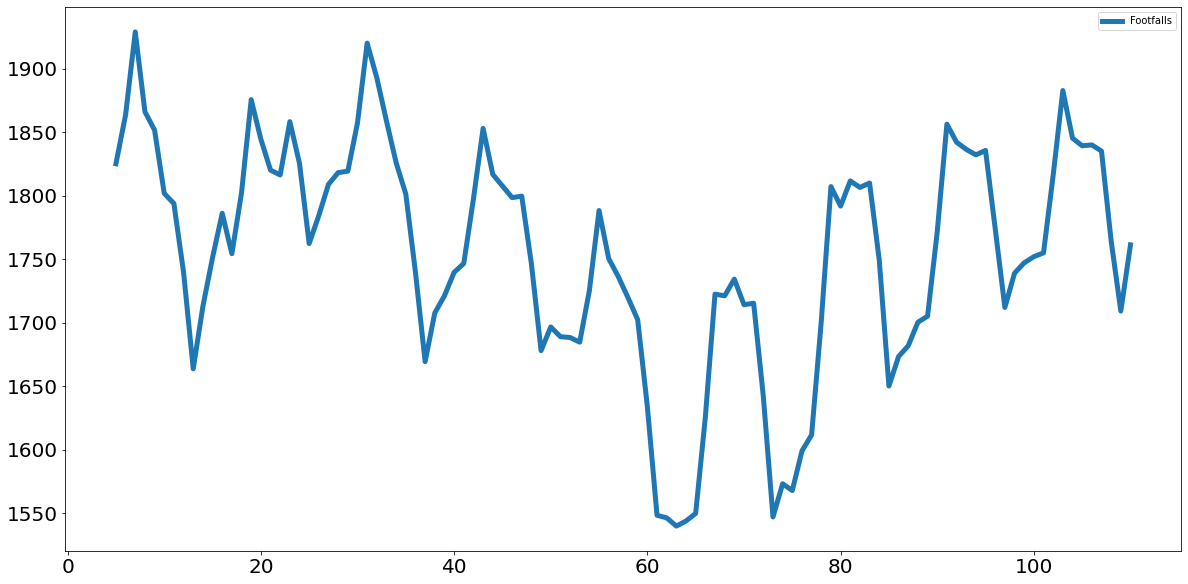

In [107]:
#Rooling mean
rider = train[['Footfalls']]
rider.rolling(6).mean().plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.show()

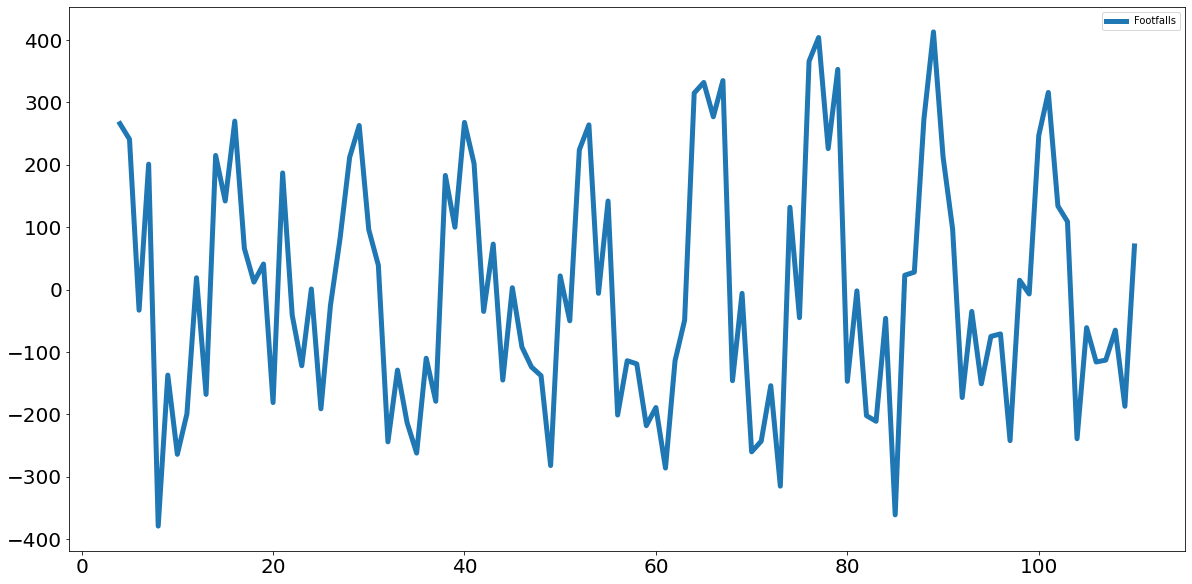

In [108]:
#difference
rider.diff(periods=4).plot(figsize=(20,10), linewidth=5, fontsize=20)
plt.show()

In [16]:
#Augmented -Dickey fuller test
test_result=adfuller(train['Footfalls'])


In [17]:
#HYPOTHESIS TEST:
#Ho: It is non stationary
#H1: It is stationary

def adfuller_test(Footfalls):
    
    result=adfuller(Footfalls)
    
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data has no unit root and is stationary")
    else:
        print("weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary ")

In [18]:
adfuller_test(train['Footfalls'])

ADF Test Statistic : -1.068474843855768
p-value : 0.7274786897402209
#Lags Used : 12
Number of Observations Used : 98
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


In [19]:
#Differencing
train['Seasonal First Difference']=train['Footfalls']-train['Footfalls'].shift(12)

In [20]:
train.head(14)

,Footfalls,May,Seasonal First Difference
Month,,,
1991-01-01,1709,0,NaN
1991-02-01,1621,0,NaN
1991-03-01,1973,0,NaN
1991-04-01,1812,0,NaN
1991-05-01,1975,1,NaN
1991-06-01,1862,0,NaN
1991-07-01,1940,0,NaN
1991-08-01,2013,0,NaN
1991-09-01,1596,0,NaN


In [21]:
## Again test dickey fuller test
adfuller_test(train['Seasonal First Difference'].dropna())

ADF Test Statistic : -1.8661073347533783
p-value : 0.3481693444156887
#Lags Used : 12
Number of Observations Used : 86
weak evidence against null hypothesis, time series has a unit root, indicating it is non-stationary 


<AxesSubplot:xlabel='Month'>

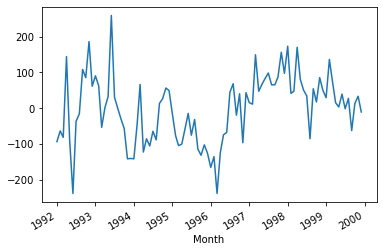

In [22]:
#plotting the Season first difference
train['Seasonal First Difference'].plot()

Now, our data is stationary

AUTO-CORRELATION | PARTIAL AUTO-CORRELATION:

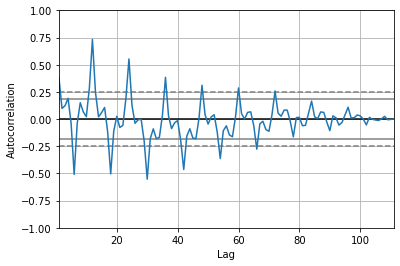

In [23]:
#plotting the acf and pacf
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(train['Footfalls'])
plt.show()

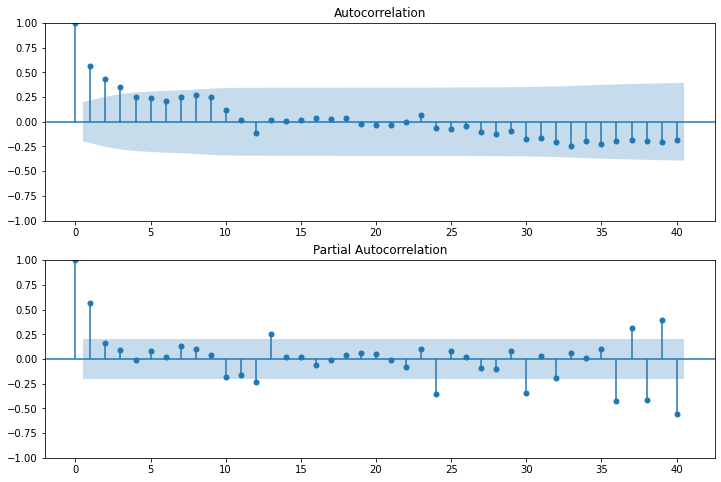

In [24]:
import statsmodels.api as sm
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(train['Seasonal First Difference'].iloc[13:],lags=40,ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(train['Seasonal First Difference'].iloc[13:],lags=40,ax=ax2)

Here these two graphs will help you to find the p and q values.
Partial AutoCorrelation Graph is for the p-value.
AutoCorrelation Graph for the q-value.

ARIMA MODEL

In [25]:
#importing the necessary libraries
from statsmodels.tsa.arima.model import ARIMA

In [26]:
#model fitting
model=ARIMA(train['Footfalls'],order=(1,1,1))
model_fit=model.fit()

In [27]:
#model summary
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:              Footfalls   No. Observations:                  111
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -701.908
Date:                Mon, 09 Jan 2023   AIC                           1409.816
Time:                        21:27:33   BIC                           1417.917
Sample:                             0   HQIC                          1413.102
                                - 111                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3549      0.090      3.933      0.000       0.178       0.532
ma.L1         -0.9551      0.037    -25.845      0.000      -1.028      -0.883
sigma2      2.006e+04   3388.291      5.920      0.000    1.34e+04    2.67e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):                 5.30
Prob(Q):                              0.78   Prob(JB):                         0.07
Heteroskedasticity (H):               1.01   Skew:                            -0.42
Prob(H) (two-sided):                  0.99   Kurtosis:                         2.33
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<AxesSubplot:xlabel='Month'>

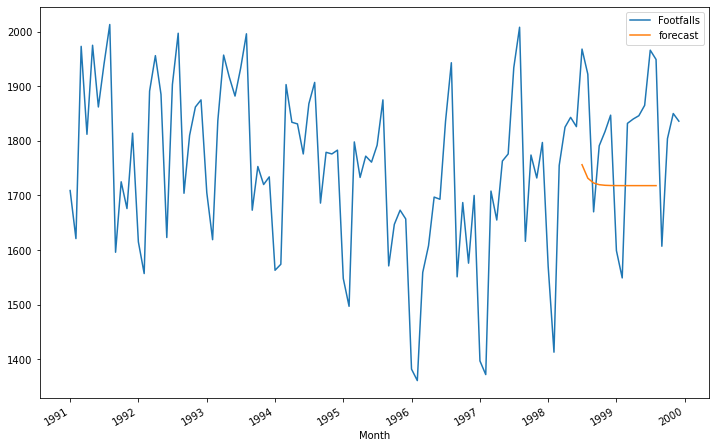

In [28]:
#fitting and plotting of the model for forecast
train['forecast']=model_fit.predict(start=90,end=103,dynamic=True)
train[['Footfalls','forecast']].plot(figsize=(12,8))

SARIMA MODEL

In [29]:
#importing the necessary plibraries
import statsmodels.api as sm

model=sm.tsa.statespace.SARIMAX(df['Sales'],order=(1, 1, 1),seasonal_order=(1,1,1,12))
results=model.fit()

In [109]:
# Applying Seasonal ARIMA model to forcast the data 
mod = sm.tsa.SARIMAX(train['Footfalls'], trend='n', order=(0,1,0), seasonal_order=(1,1,1,12))
results = mod.fit()
print(results.summary())

                                      SARIMAX Results                                       
Dep. Variable:                            Footfalls   No. Observations:                  111
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -560.484
Date:                              Mon, 09 Jan 2023   AIC                           1126.969
Time:                                      21:50:20   BIC                           1134.723
Sample:                                           0   HQIC                          1130.105
                                              - 111                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12       0.1287      0.182      0.706      0.480      -0.229       0.486
ma.S.L12      -0.99

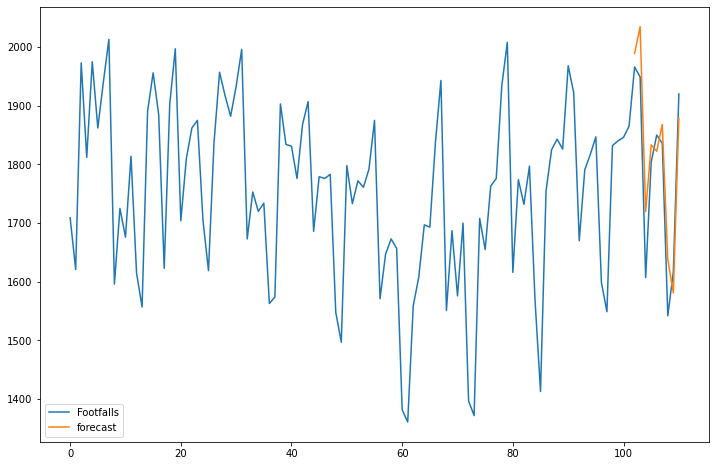

In [110]:
#forecast prediction
train['forecast'] = results.predict(start = 102, end= 120, dynamic= True)  
train[['Footfalls', 'forecast']].plot(figsize=(12, 8))
plt.show()

Here the blue lines are the actual values, and the orange lines are the predicted data

In [111]:
def forcasting_future_months(train, no_of_months):
    df_perdict = df.reset_index()
    mon = df_perdict['Month']
    mon = mon + pd.DateOffset(months = no_of_months)
    future_dates = mon[-no_of_months -1:]
    df_perdict = df_perdict.set_index('Month')
    future = pd.DataFrame(index=future_dates, columns= df_perdict.columns)
    df_perdict = pd.concat([df_perdict, future])
    df_perdict['forecast'] = results.predict(start = 114, end = 125, dynamic= True)  
    df_perdict[['Footfalls', 'forecast']].iloc[-no_of_months - 12:].plot(figsize=(12, 8))
    plt.show()
    return df_perdict[-no_of_months:]

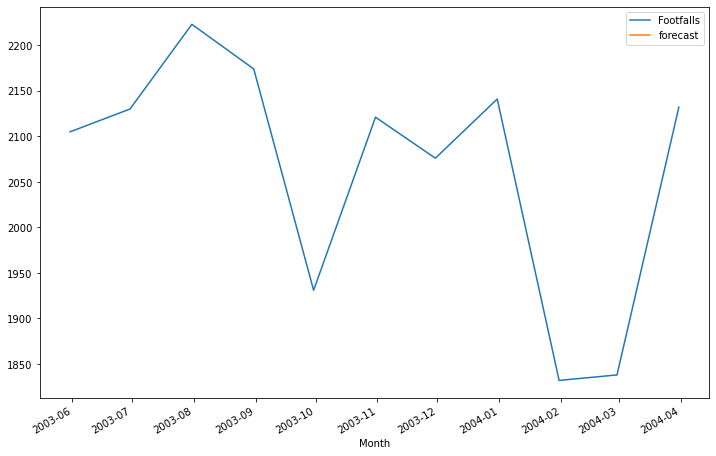

In [112]:
predicted = forcasting_future_months(train,10)

This way,we can predict the footfalls for future months